In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'questions.csv')

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


* Targert column: 0 indicates non-duplicate and 1 indicates duplicate

In [4]:
data.shape

(404351, 6)

In [5]:
new_data = data.sample(30000, random_state=42)

In [6]:
new_data.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
data.duplicated().sum()

0

is_duplicate
0    18914
1    11086
Name: count, dtype: int64


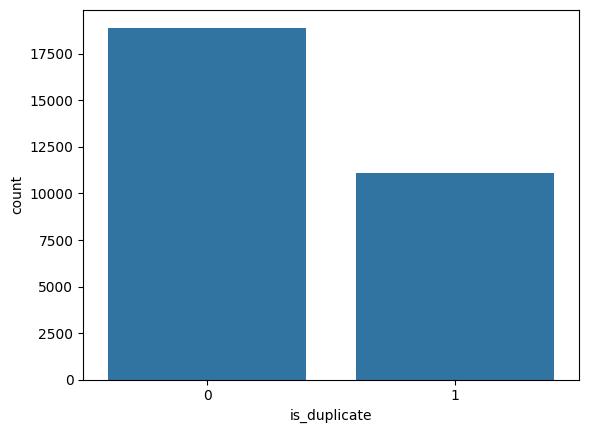

In [8]:
# distribution of target variable
print(new_data['is_duplicate'].value_counts())
sns.countplot(x='is_duplicate', data=new_data)
plt.show()

In [9]:
# unique questions in the dataset

q_id = pd.Series(new_data['qid1'].tolist() + new_data['qid2'].tolist())
print("Number of Unique questions in the data:", q_id.unique().shape[0])

dup = q_id.value_counts() > 1
print("Number of duplicate questions in the data:", dup.sum())

Number of Unique questions in the data: 59824
Number of duplicate questions in the data: 160


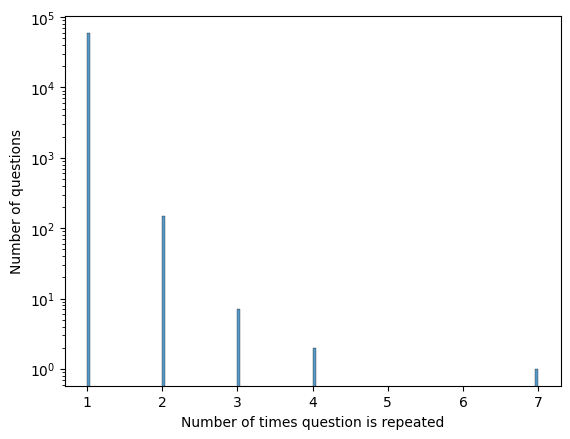

In [10]:
# repeated questions histogram

sns.histplot(q_id.value_counts(), bins=150)
plt.yscale('log')
plt.xlabel('Number of times question is repeated')
plt.ylabel('Number of questions')
plt.show()

* so most of the questions are unique and only a few are repeated multiple times

## Feature Engineering

In [11]:
# length of questions

new_data['q1_len'] = new_data['question1'].str.len()
new_data['q2_len'] = new_data['question2'].str.len()

In [12]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
120567,120567,238932,238933,How does the Boggart work?,What would the boggart of a boggart be?,0,26,39
324466,324466,636476,636477,What is difference between project manager and...,What are the differences between project manag...,0,63,76
398558,398558,778728,778729,What hotel in Jabalpur would be safe for unmar...,What hotel in Allahabad would be safe for unma...,0,124,125
339914,339914,666314,666315,What is stronger - Super Saiyan 4 or Super Sai...,How does Gohan turn into Super Saiyan 2?,0,54,40
185732,185732,366764,366765,How do I fill in Address Line 1 and Address Li...,How do I register desired web address?,0,51,38


In [13]:
# number of words in questions

new_data['q1_word_count'] =  new_data['question1'].apply(lambda x: len(x.split()))
new_data['q2_word_count'] =  new_data['question2'].apply(lambda x: len(x.split()))

In [14]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count
120567,120567,238932,238933,How does the Boggart work?,What would the boggart of a boggart be?,0,26,39,5,8
324466,324466,636476,636477,What is difference between project manager and...,What are the differences between project manag...,0,63,76,9,10
398558,398558,778728,778729,What hotel in Jabalpur would be safe for unmar...,What hotel in Allahabad would be safe for unma...,0,124,125,20,20
339914,339914,666314,666315,What is stronger - Super Saiyan 4 or Super Sai...,How does Gohan turn into Super Saiyan 2?,0,54,40,11,8
185732,185732,366764,366765,How do I fill in Address Line 1 and Address Li...,How do I register desired web address?,0,51,38,12,7


In [15]:
# number of common words between question pairs

def common_words(row):
    w1 = set(row['question1'].lower().strip().split())
    w2 = set(row['question2'].lower().split())

    return len(w1.intersection(w2))

In [16]:
len(set('How does the Boggart work?'.lower().strip().split()))

5

In [17]:
new_data['common_word_count'] = new_data.apply(common_words, axis=1)

In [18]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count
120567,120567,238932,238933,How does the Boggart work?,What would the boggart of a boggart be?,0,26,39,5,8,2
324466,324466,636476,636477,What is difference between project manager and...,What are the differences between project manag...,0,63,76,9,10,4
398558,398558,778728,778729,What hotel in Jabalpur would be safe for unmar...,What hotel in Allahabad would be safe for unma...,0,124,125,20,20,18
339914,339914,666314,666315,What is stronger - Super Saiyan 4 or Super Sai...,How does Gohan turn into Super Saiyan 2?,0,54,40,11,8,2
185732,185732,366764,366765,How do I fill in Address Line 1 and Address Li...,How do I register desired web address?,0,51,38,12,7,3


In [19]:
# total number of words in question pairs

def length_words(row):
    w1 = row['question1'].lower().strip().split()
    w2 = row['question2'].lower().strip().split()

    return (len(w1) + len(w2))

In [20]:
new_data['total_word_count'] = new_data.apply(length_words, axis=1)

In [21]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count,total_word_count
120567,120567,238932,238933,How does the Boggart work?,What would the boggart of a boggart be?,0,26,39,5,8,2,13
324466,324466,636476,636477,What is difference between project manager and...,What are the differences between project manag...,0,63,76,9,10,4,19
398558,398558,778728,778729,What hotel in Jabalpur would be safe for unmar...,What hotel in Allahabad would be safe for unma...,0,124,125,20,20,18,40
339914,339914,666314,666315,What is stronger - Super Saiyan 4 or Super Sai...,How does Gohan turn into Super Saiyan 2?,0,54,40,11,8,2,19
185732,185732,366764,366765,How do I fill in Address Line 1 and Address Li...,How do I register desired web address?,0,51,38,12,7,3,19


In [22]:
# word share in question pairs

new_data['word_share'] = round(new_data['common_word_count']/new_data['total_word_count'], 2)

In [23]:
new_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count,total_word_count,word_share
120567,120567,238932,238933,How does the Boggart work?,What would the boggart of a boggart be?,0,26,39,5,8,2,13,0.15
324466,324466,636476,636477,What is difference between project manager and...,What are the differences between project manag...,0,63,76,9,10,4,19,0.21
398558,398558,778728,778729,What hotel in Jabalpur would be safe for unmar...,What hotel in Allahabad would be safe for unma...,0,124,125,20,20,18,40,0.45
339914,339914,666314,666315,What is stronger - Super Saiyan 4 or Super Sai...,How does Gohan turn into Super Saiyan 2?,0,54,40,11,8,2,19,0.11
185732,185732,366764,366765,How do I fill in Address Line 1 and Address Li...,How do I register desired web address?,0,51,38,12,7,3,19,0.16


# Visualization of Features

minimun characters in question1: 1
maximum characters in question1: 345
average characters in question1: 59.5329


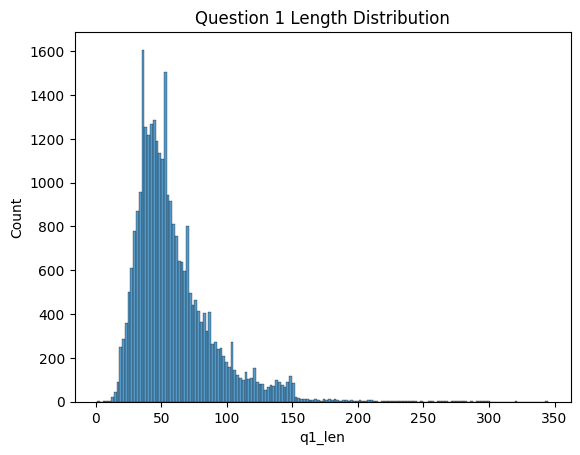

In [24]:
print("minimun characters in question1:", new_data['q1_len'].min())
print("maximum characters in question1:", new_data['q1_len'].max())
print("average characters in question1:", new_data['q1_len'].mean())

sns.histplot(new_data['q1_len'])
plt.title('Question 1 Length Distribution')
plt.show()

* most of the questions have the length between 40 - 70 characters.
* questions with length more than 150 characters are very less.
 

minimun characters in question2: 11
maximum characters in question2: 1151
average characters in question2: 60.04156666666667


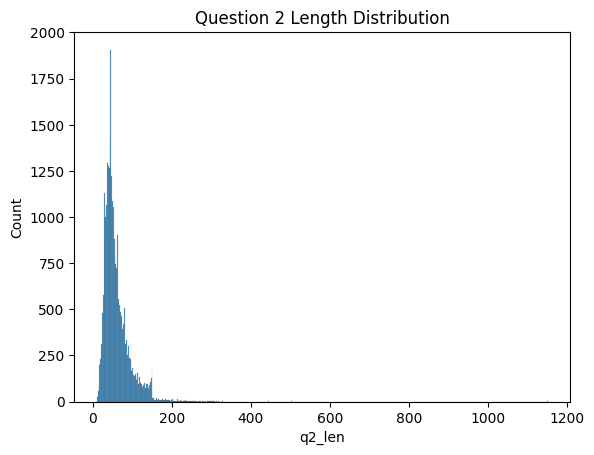

In [25]:
print("minimun characters in question2:", new_data['q2_len'].min())
print("maximum characters in question2:", new_data['q2_len'].max())
print("average characters in question2:", new_data['q2_len'].mean())

sns.histplot(new_data['q2_len'])
plt.title('Question 2 Length Distribution')
plt.show()

* most of the questions have the length between 60 - 90 characters
* very few questions ahve the length more than 200

minimun words in question1: 1
maximum words in question1: 68
average words in question1: 10.9374


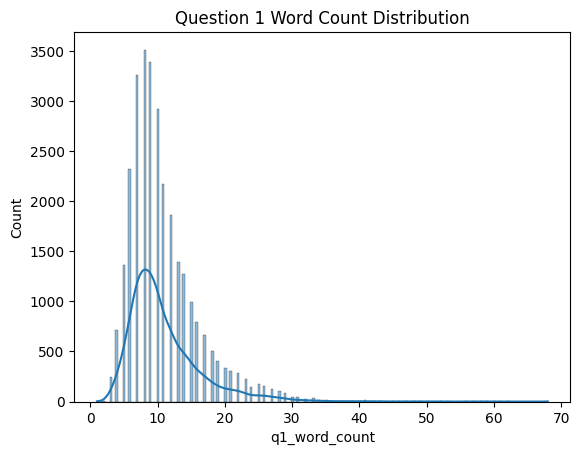

In [26]:
print("minimun words in question1:", new_data['q1_word_count'].min())
print("maximum words in question1:", new_data['q1_word_count'].max())
print("average words in question1:", new_data['q1_word_count'].mean())

sns.histplot(new_data['q1_word_count'],kde=True)
plt.title('Question 1 Word Count Distribution')
plt.show()

* the distribution is right skewed indicating that most of the questions consist of very words
* most frequent word count is in between 8 to 12

minimun words in question2: 2
maximum words in question2: 237
average words in question2: 11.165833333333333


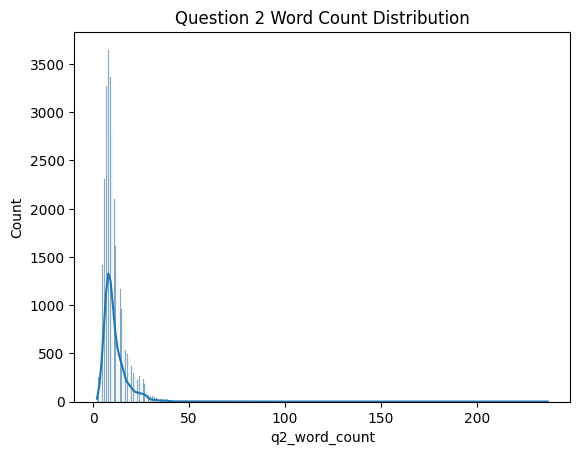

In [27]:
print("minimun words in question2:", new_data['q2_word_count'].min())
print("maximum words in question2:", new_data['q2_word_count'].max())
print("average words in question2:", new_data['q2_word_count'].mean())

sns.histplot(new_data['q2_word_count'], kde=True)
plt.title('Question 2 Word Count Distribution')
plt.show()

*  few questions have very high word count
* most of the questions have the word count between 5 - 20

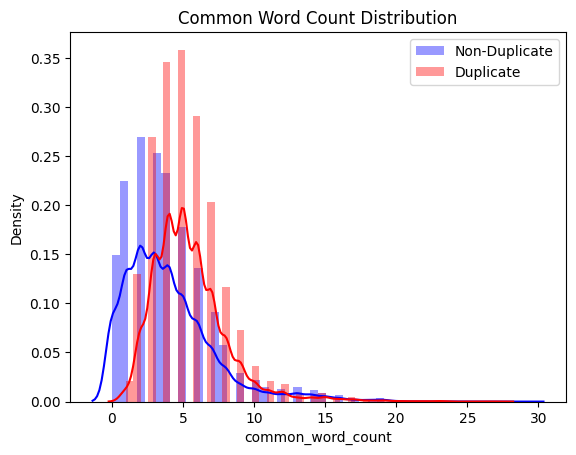

In [28]:
# common words distribution in duplicate and non-duplicates questions 

sns.distplot(new_data[new_data['is_duplicate']==0]['common_word_count'], color='blue', label='Non-Duplicate')
sns.distplot(new_data[new_data['is_duplicate']==1]['common_word_count'], color='red', label='Duplicate')
plt.legend()
plt.title('Common Word Count Distribution')
plt.show()

* Duplicate questions tend to have more common words that non-duplicate questions.
* If the common words in q1 and q2 are less than 4 then probability of that question being non-duplicate is high and has high probability if common words are more than 4.
* The frequency for duplicates peaks around 4 to 6 common words, while non-duplicates peak much earlier at around 2 to 3.
* As the number of common words increases (above 4), a pair is significantly more likely to be a duplicate.

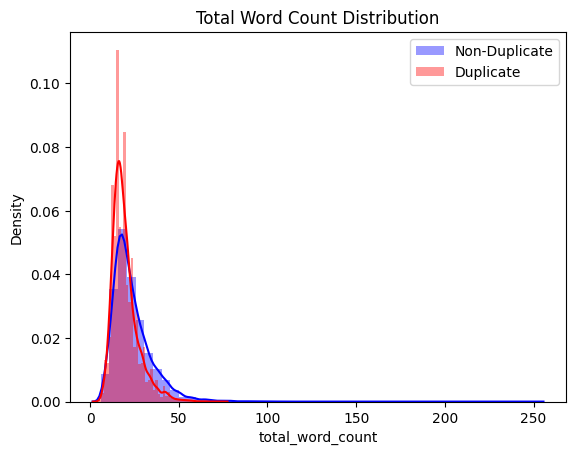

In [29]:
# total words distribution in duplicate and non-duplicates questions

sns.distplot(new_data[new_data['is_duplicate']==0]['total_word_count'], color='blue', label='Non-Duplicate')
sns.distplot(new_data[new_data['is_duplicate']==1]['total_word_count'], color='red', label='Duplicate')
plt.legend()
plt.title('Total Word Count Distribution')
plt.show()

* Duplicate questions  are more likely to have less word count, their total word count tends to peak and decline faster than non-duplicate questions.
* Non-duplicate questions have higher total word count compared to duplicate questions. 

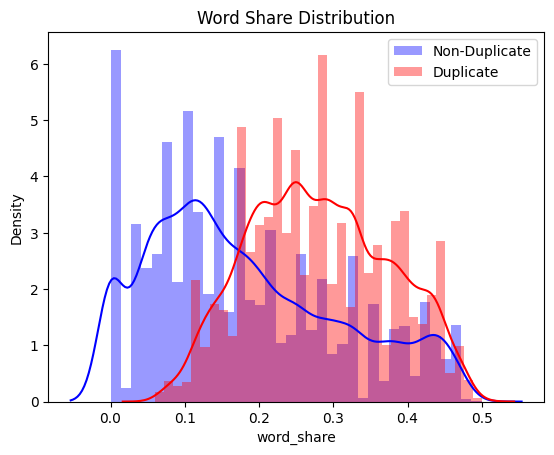

In [30]:
# word share distribution between question pairs
sns.distplot(new_data[new_data['is_duplicate']==0]['word_share'], color='blue', label='Non-Duplicate')
sns.distplot(new_data[new_data['is_duplicate']==1]['word_share'], color='red', label='Duplicate')
plt.legend()
plt.title('Word Share Distribution')
plt.show()

* Duplicate questions have a much higher "word share," with the majority of the data concentrated between 0.2 and 0.4.
* Non-duplicate questions are heavily clustered at the lower end, particularly near 0.0 to 0.15, meaning they share very little of their unique vocabulary.
* If the word shaare is less than 0.2 then high probability for non-duplicate and more than 0.2 high probability of being duplicate.

In [31]:
ques_data = new_data[['question1', 'question2']]

In [32]:
ques_data.head()

,question1,question2
120567,How does the Boggart work?,What would the boggart of a boggart be?
324466,What is difference between project manager and...,What are the differences between project manag...
398558,What hotel in Jabalpur would be safe for unmar...,What hotel in Allahabad would be safe for unma...
339914,What is stronger - Super Saiyan 4 or Super Sai...,How does Gohan turn into Super Saiyan 2?
185732,How do I fill in Address Line 1 and Address Li...,How do I register desired web address?


In [33]:
final_data = new_data.drop(columns=['id','qid1','qid2','question1','question2'])

In [34]:
print(final_data.shape)
final_data.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_word_count,q2_word_count,common_word_count,total_word_count,word_share
120567,0,26,39,5,8,2,13,0.15
324466,0,63,76,9,10,4,19,0.21
398558,0,124,125,20,20,18,40,0.45
339914,0,54,40,11,8,2,19,0.11
185732,0,51,38,12,7,3,19,0.16


In [35]:
# 3. Convert your numerical metadata into sparse to avoid memory error

from scipy.sparse import hstack, csr_matrix

final_data = final_data.drop(columns=['is_duplicate'])
meta_features_sparse = csr_matrix(final_data.values)       

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_data['question1']) + list(ques_data['question2'])
vectorizer = CountVectorizer(max_features=3000)

vectorizer.fit(questions)

CountVectorizer(max_features=3000)

In [37]:
q1_vector = vectorizer.transform(ques_data['question1'])
q2_vector = vectorizer.transform(ques_data['question2'])

print(q1_vector.shape)
print(q2_vector.shape)

(30000, 3000)
(30000, 3000)


In [38]:
# Stack everything horizontally: [Metadata] + [Q1 Vectors] + [Q2 Vectors]
q_final = hstack([meta_features_sparse, q1_vector, q2_vector])

print(q_final.shape) 

(30000, 6007)


In [42]:
X = q_final                     
y = new_data['is_duplicate']    


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
lor = LogisticRegression(max_iter=500)
lor.fit(X_train, y_train)
y_pred_lr = lor.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Accuracy: 0.761


In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.7713333333333333


In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.7606666666666667


* We can the accuracy has improved in all the three models after feature engineering